# Ingresos


In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# ETL

Importamos el dataset de `ingresos` a utilizar.


In [10]:
ingresos = pd.read_csv('../Datasets/Ingresos.csv')

Vemos los primeros datos del dataframe.

In [11]:
ingresos.head(15)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2033,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022
5,2022,3,6.408678e+07,Jul-Sept 2022
6,2022,2,6.041950e+07,Abr-Jun 2022
7,2022,1,5.521931e+07,Ene-Mar 2022
8,2021,4,4.546789e+07,Oct-Dic 2021
9,2021,3,4.299994e+07,Jul-Sept 2021


Tenemos un error de entrada en el dataset de ingresos en el indice 3 donde el año es superior a 2023. Por lo tanto lo modificaremos a 2023 verificando que sea el unico. 

In [12]:
print(ingresos[ingresos["Año"] > 2023])
ingresos.loc[3, "Año"] = 2023
ingresos.head()

    Año  Trimestre  Ingresos (miles de pesos)       Periodo
3  2033          1               1.041350e+08  Ene-Mar 2023


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2023,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022


Con este dataframe ya no hay datos erroneos podemos continuar al EDA.

# EDA

Verificamos los datos para comprobar que no hay nulos ni duplicados en el dataset.

In [13]:
print("total de nulos: ", ingresos.isnull().sum().sum())
print("total de duplicados: ", ingresos.duplicated().sum().sum())

total de nulos:  0
total de duplicados:  0


Afortunadamente no hay duplicados ni nulos. Por lo que podemos continuar con los outliers.

## Outliers

### Ingresos.

Ahora veremos los outliers del dataframe de ingresos

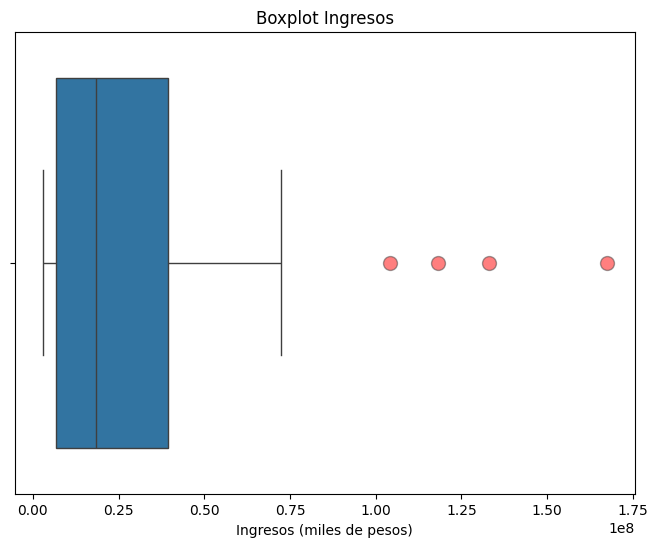

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(ingresos, x="Ingresos (miles de pesos)", flierprops={
            'marker': 'o', 'markerfacecolor': 'red', 'alpha': 0.5}, fliersize=10)
plt.title('Boxplot Ingresos')

plt.show()

Por lo que vemos son pocos outliers, veamos cuales son. 

Usaremos la funcion `outliers_iqr` para detectar los outliers a traves de sus cuartiles y limites.

In [33]:
def outliers_iqr(column: pd.Series) -> tuple:
    q1, q3 = column.quantile(0.25), column.quantile(0.75)
    iqr = q3 - q1
    
    top = q3 + 1.5 * iqr
    bot = q3 - 1.5 * iqr
    
    return ((column < bot) | (column > top))

In [34]:
outlier_ingreso = outliers_iqr(ingresos["Ingresos (miles de pesos)"])
ingresos[outlier_ingreso]

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2023,1,1.041350e+08,Ene-Mar 2023


Estos datos se consideran outliers debido a la diferencia de los otros años, con el dataset de tecnologias vimos que estan creciendo bastante en las provincias principales y el aumento de las fibras opticas apoya este crecimiento. Pero esta exageracion del crecimiento de los ingresos es principalmente por inflacion que ha pasado el pais.

Para analizar correctamente los ingresos lo tendremos que pasar a dolares.

## Agregar ingreso por dolares. 

# Graficos

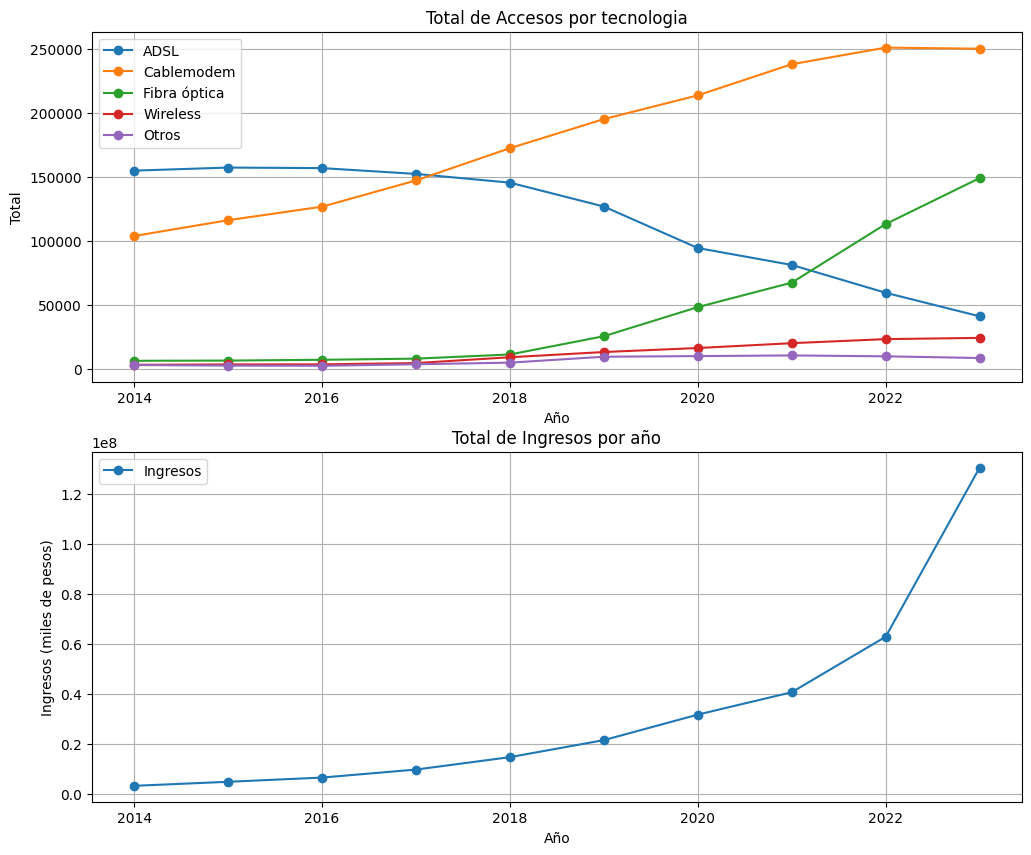

<Figure size 1000x600 with 0 Axes>

In [43]:
promedio_por_anio = tecnologia.groupby('Año').agg({'ADSL': 'mean', 'Cablemodem': 'mean', 'Fibra óptica': 'mean', 'Wireless': 'mean', 'Otros': 'mean'})

promedio_ingreso_anio = ingresos.groupby('Año').agg({'Trimestre': 'mean', 'Ingresos (miles de pesos)': 'mean'})

fg, axs = plt.subplots(2, 1, figsize=(12, 10))

plt.figure(figsize=(10, 6))

axs[1].plot(promedio_ingreso_anio.index, promedio_ingreso_anio['Ingresos (miles de pesos)'], label='Ingresos', marker='o')
axs[1].set_title('Total de Ingresos por año')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Ingresos (miles de pesos)')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()